WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (50, -155.91415339419467)
(episode, score) = (100, -265.458885920724)
(episode, score) = (150, -135.02226045640802)
(episode, score) = (200, -293.898394423476)
(episode, score) = (250, -177.73692571230123)
(episode, score) = (300, -220.44373978421459)
(episode, score) = (350, -343.45426422845514)
(episode, score) = (400, -356.535148953355)
(episode, score) = (450, -71.34327443225384)
(episode, score) = (500, -596.9251358941613)
(episode, score) = (550, -93.81647319029929)
(episode, score) = (600, -134.36239438534835)
(episode, score) = (650, -20.58450085036064)
(episode, score) = (700, -393.4235124248154)
(episode, score) = (750, -352.58373325256105)
(episode, score) = (800, -86.99709384889607)
(episode, score) = (850, -175.79978853450285)
(episode, score) = (900, -133.43502738415128)
(episode, score) = (950, -80.33103977672981)
(episode, score) = (1000, -130.48511308590

(episode, score) = (8950, 39.28155334537238)
(episode, score) = (9000, 207.35905922684714)
(episode, score) = (9050, 51.36345299500134)
(episode, score) = (9100, 86.41932964515848)
(episode, score) = (9150, 34.09141220198998)
(episode, score) = (9200, 79.71250224873305)
(episode, score) = (9250, 63.46604857314782)
(episode, score) = (9300, 92.55332469531302)
(episode, score) = (9350, 108.4838614590115)
(episode, score) = (9400, 87.91991488563774)
(episode, score) = (9450, 74.63957663387681)
(episode, score) = (9500, 230.64460957299522)
(episode, score) = (9550, 162.87297941128813)
(episode, score) = (9600, 178.84456023101404)
(episode, score) = (9650, 75.73908864539439)
(episode, score) = (9700, 94.99690851845511)
(episode, score) = (9750, 140.00128588040522)
(episode, score) = (9800, 140.0570634736747)
(episode, score) = (9850, 93.18222678191749)
(episode, score) = (9900, 71.12459091196214)
(episode, score) = (9950, 139.10099265494483)
(episode, score) = (10000, 113.56829559151306)


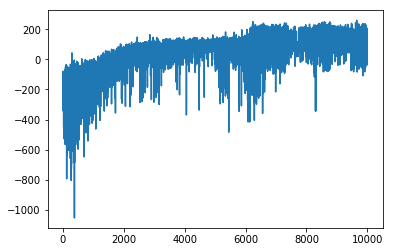

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent import PolicyAgent    #defined my agent here
%matplotlib inline


EPISODES = 10000

env = gym.make('LunarLander-v2')
env.seed(1)  #seed for convenience
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
agent = PolicyAgent(num_states, num_actions)
agent.gamma = 0.99
agent.learning_rate = 0.02
# agent.load("./save/cartpole-dqn.h5")
done = False

scores = []

for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    done = False
    while not done:
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward)
        state = next_state

    #Learn & print results
    agent.learn()
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))
plt.plot(scores)
np.savetxt('stats/scores_lunar_landing.txt',scores)

1. Ok, I expect high variance, since this is just vanilla policy gradient. 
2. Adding in a baseline, and then doing an honest A2C, should improve this.


### Watch a smart agent!

In [12]:
state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    agent.remember(state[0], action, reward)
    state = next_state
env.close()

### Notes

1. I needed to normalize the discounted return, this helped the learning